# Lab 2 — Altair

In last week's lab, we used Tableau to create a dashboard from places in France.  Tableau is a great tool, but it has two primary limitations: 1) while Tableau is quite powerful—and we've only scratched the surface of what it can do—sometimes you need to do more. 2) A lot of statistical data work is done programmatically rather than through a drag-n-drop interface.

This week, we will continue to work with the Places-in-France dataset.  This time, we will use [Altair][], a Python library for creating statistical visualizations.

[Altair]: https://altair-viz.github.io

The goals of this lab are:

* Get a better understanding of grammar of statistical visualisations: spaces, mappings, marks, and encodings,
* Give you a sense of a complementary, programmatic way of creating an interactive visualisation,
* Understand the declarative way of thinking used by Altair, Vega-Lite, and D3.

With that in mind, let's get started.

## Loading data

[Download our Places-in-France dataset][data] and place it in the same folder as this notebook.

We'll now need to import it into our project.  Altair can manage multiple data formats.  In our case, we'll use a version of last week's data converted into CSV format.  (It can also handle TSV, JSON, and Pandas Dataframes.)

In our case, we're going to just use the name of our CSV file.  You could also use a URL or a full path.

[data]: https://perso.telecom-paristech.fr/eagan/class/igr204/data/france.csv

In [1]:
# Import the Altair library
# by convention, we use alt to save typing, but you can just 'import altair' if you wish
import altair as alt 

# Reference to data
france = 'france.csv'

/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.21.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


## Making a basic chart

Recall that our data set has columns `Postal Code`, `x`, `y`, `inseecode`, `place`, `population`, and `density`.  Let's make a map that plots the `x` vs `y` columns as points. 

In the code below, we'll make a `Chart` from the `france` data using `point` marks.  We'll bind (or _encode_ the chart's `x=` axis to the `x` attribute of our data set (and similarly for `y`).  In both cases, we tell Altair that the data are `Q`uantitative with `:Q`.  (There's also `:N` for nominal/categorical data, `:O` for ordinal, and `:T` for temporal data.)

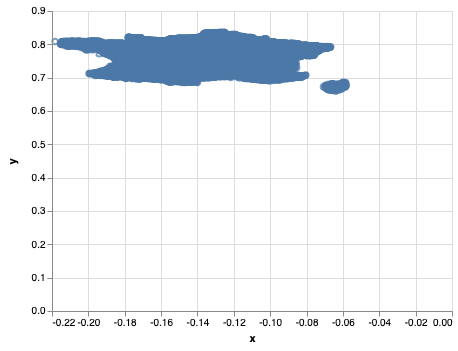

In [3]:
map = alt.Chart(france).mark_point().encode(
    x='x:Q',
    y='y:Q'
)

map

That looks nice, but notice that Altair shows the origin (0, 0) by default.  That's usually what you want, but not in this case.  Let's tell Altair to hide the axes and the origin.

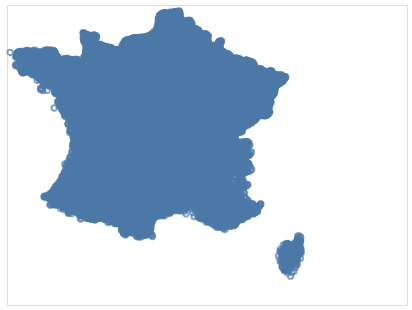

In [4]:
## Hmm, looks nice, but let's change the default scales.
## Need to change from shorthand notation.

map = alt.Chart(france).mark_point().encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False))
)

map

In the previous map, we had used Altair's shorthand syntax to specify the data bindings.  That works for the common case, but here we need more control, so we have to use an explicit object for the `x` and `y` dimensions: `alt.X(...)` and `alt.Y(...)`.  We also need to create a `Scale` to set its `zero=False`.

This new chart looks much better, but we really can't see much detail here.  Let's reduce the default mark `size` to `1`.  We're also going to adjust the chart `properties` to set the width and height to something bigger.

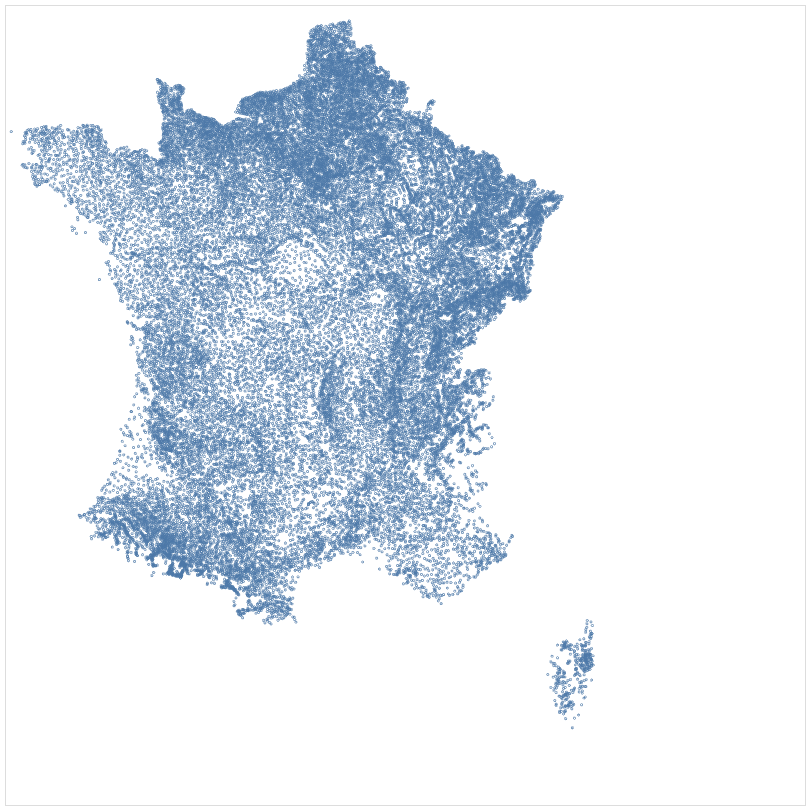

In [7]:
## Much better, but we really can't see much here.  Let's make the point sizes smaller and make the canvas bigger

map = alt.Chart(france).mark_point(size=1).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False))
).properties(
    width=800,
    height=800
)

map

In Altair, a chart is made up of three primary things:

* Marks — the kinds of shapes to draw
* Encodings — a mapping from data to attributes of the marks
* Properties — meta-data about the chart

Now that we've seen each of them, let's talk a little more about each.

### Marks

_Marks_ are the kinds of shapes that we want to draw.  Here is a summary of the kinds of marks in Altair, taken from the [Altair documentation](https://altair-viz.github.io/user_guide/marks.html).

| Mark Name  | Method            |   Description                                    |
| ---------- | ----------------- |------------------------------------------------- |
| area       | `mark_area()`     | A filled area plot.                              |
| bar        | `mark_bar()`      | A bar plot.                                      |
| circle     | `mark_circle()`   | A scatter plot with filled circles.              |
| geoshape   | `mark_geoshape()` | A geographic shape                               |
| line       | `mark_line()`     | A line plot.                                     |
| point      | `mark_point()`    | A scatter plot with configurable point shapes.   |
| rect       | `mark_rect()`     | A filled rectangle, used for heatmaps            |
| rule       | `mark_rule()`     | A vertical or horizontal line spanning the axis. |
| square     | `mark_square()`   | A scatter plot with filled squares.              |
| text       | `mark_text()`     | A scatter plot with points represented by text.  |
| tick       | `mark_tick()`     | A vertical or horizontal tick mark.              |

The basic idea is that each data point will get mapped into one of these types of marks.

### Encodings

Encodings determine the binding between the data point and the mark.  In our example, we've been encoding the `x` and `y` data columns to each mark's `x`- and `y`-position.  As you can see in the [Altair documentation](https://altair-viz.github.io/user_guide/encoding.html#encoding-channels), there are positional encodings, mark property encodings (as we'll see in the next step), and interaction encodings (as we'll see later for with tooltips).

Let's go ahead and bind the size of the places to their population in our data set.  In other words, we're going to _encode_ the `population` data attribute by the _size_ of each _mark_.

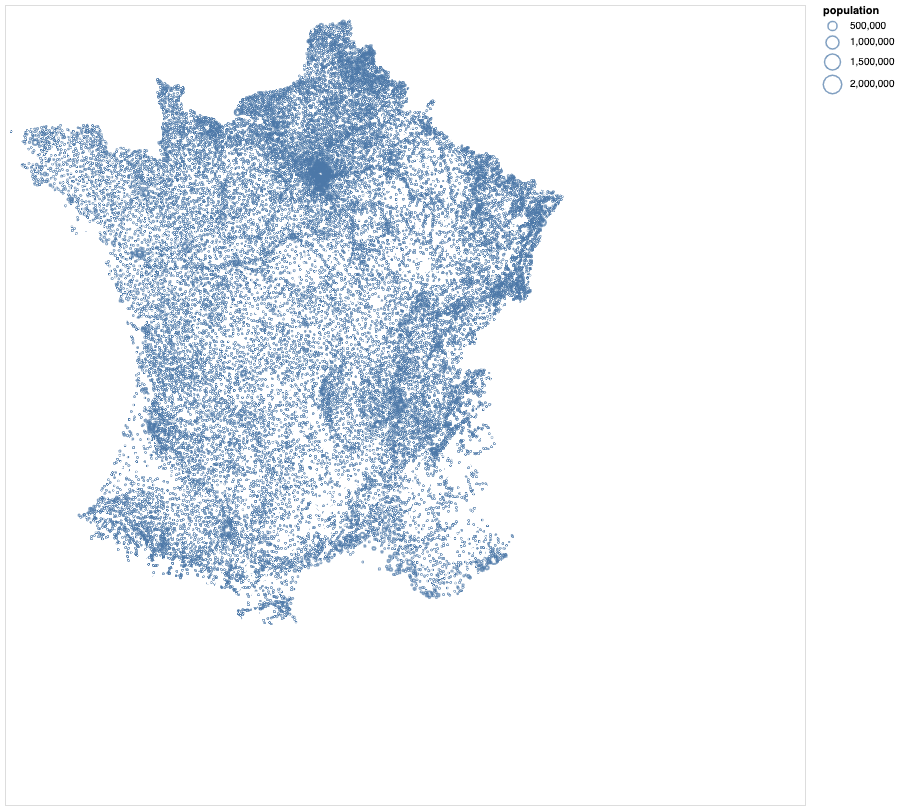

In [8]:
map = alt.Chart(france).mark_point(size=1).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)),
    
    # NEW: bind population to size
    size='population:Q',
    
    # Or, try this alternate binding that clamps the range to [1, 400] instead of the default, [0, 400].
    # size=alt.Size('population:Q', scale=alt.Scale(range=[1, 400])),
    
).properties(
    width=800,
    height=800
)

map

That looks great!  We can already start to see some interesting emergent features from our data, such as the effect of rivers, mountains, and other influences.

Notice the alternative solution in the above code.  Go ahead and try the other solution.  Do you see a difference in the output?  What do you think is going on?

---

So far, we have bindings for `x`, `y`, and `population`.  In the code below, go ahead and bind <!-- comment --> `density` to each place's color.  _Hint_: you declare a color encoding with `color=`.

<!-- 
    Simple solution:  color='density:Q'

    Complex solution:
        color=alt.Color('density:Q', type='quantitative', scale=alt.Scale(type='sqrt', range=['lightblue', 'red'])),

-->

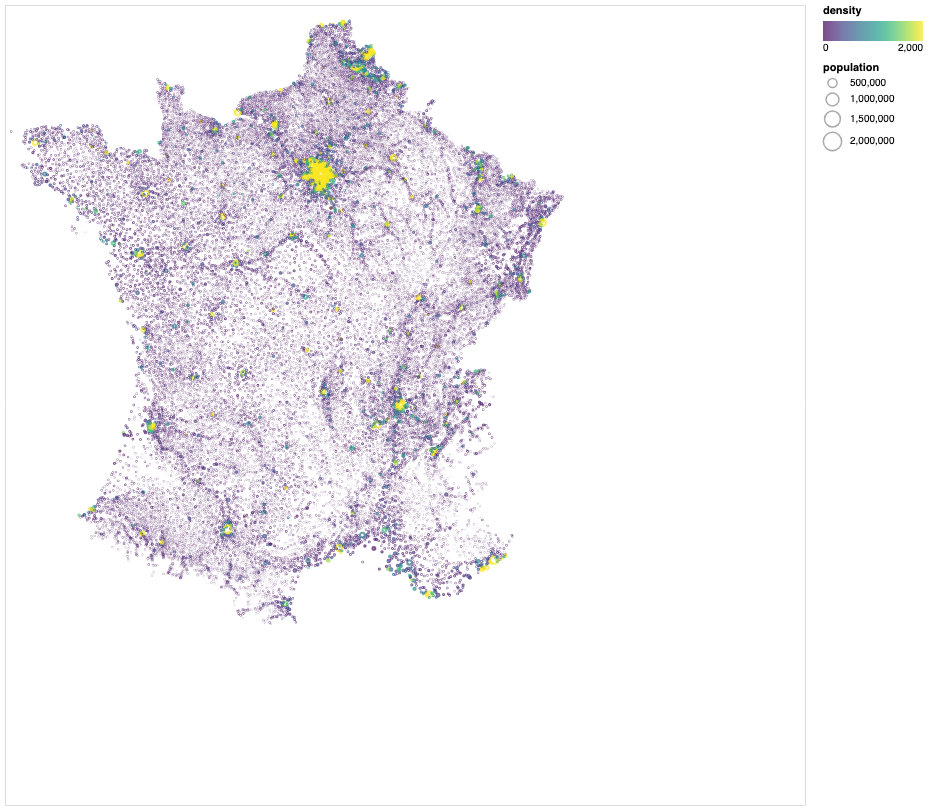

In [48]:
## How would we adapt this to encode density by color?
## Hint: you declare a color encoding with color=

map = alt.Chart(france).mark_point(size=0.5).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)),
    size='population:Q',

    # >>> your code here <<<
    #color='density:Q'
    color=alt.Color('density:Q', scale=alt.Scale(scheme='viridis', domain=[0,2000])) #, type='linear'

).properties(
    width=800,
    height=800
)

map

## Altair

So far, we've just gotten started with Altair.  Before we dig a little deeper, let's take a closer look at the shorthand notation and the classes used in Altair.

By default, Altair tries to use reasonable defaults.  If you're just exploring data, they're often good enough.  That will let you create basic charts just by binding, say, `x` and/or `y` to some column in your data table, e.g. `x='population:Q', y='density:Q'`.

But if we need to override the defaults, we need to use a more complicated syntax.  Each of the encodings defines a configurable class.  Instead of using a shorthand string, as we did above, we can pass in an instance of that class.  That's what we did in the first step when we switched from using

    x='x:Q',
    
to

    x=alt.X('x:Q', axis=None)

How did we know we could control the axis through the `axis=` keyword?  The [Altair documentation](https://altair-viz.github.io/user_guide/encoding.html#encoding-channels) lists the different encoding classes available.  A click on the `X` class on that page will take you to the documentation that enumerates the different parameters you can override from their default values.  Notice that the third attribute down shows:

    axis:anyOf(Axis, None)
    
Thus, we can either pass in an instance of the Altair `Axis` class or the value `None`—in which case, the documentation explains, that axis will be removed from the chart.


## Compared to other approaches

Some of you may have heard of or even used other libraries for creating statistical visualisations, including matplotlib, ggplot, Seaborn, and others.  Each of these libraries has a healthy community behind them and are perfectly reasonable choices to use, and most of them will use similar concepts to what we are seeing here with Altair.

In this class, however, he use Altair for several reasons:

* It has a nice mapping of Bertin's and Wilkinsin's concepts for statistical visualisation (that we saw in class earlier today!) baked into their APIs,
* It uses a declarative rather than procedural design approach,
* You can easily export your visualisations to PNG, SVG, or even interactive web pages, and
* It generates Vega-Lite descriptions that are then rendered using D3, which we'll see later on in the semester.

That second point probably needs a little more explanation.  In a procedural syntax, you could imagine saying something like:

    for each data point:
        draw circle of size datum.population at datum.x, datum.y

in our declarative approach, we'd say instead:

    make a chart for data where:
        position is (datum.x, datum.y) and size is datum.population

At first glance, those might look awfully similar, but the key difference is that, in the first case, we say _how_ to do what we want, whereas in the second case, we simply say _what_ we want.

Altair, D3, and Vega all use this second, declarative approach.  It takes some getting used to, but it is part of what makes these libraries compelling.

## Tooltips

So far, our visualisations are not particularly interactive.  Let's go ahead and change that.

The barest, most minimal interaction we can add is to show a tooltip when we hover over a place.  In Altair, we can use the [Tooltip](https://altair-viz.github.io/user_guide/generated/channels/altair.Tooltip.html) encoding.

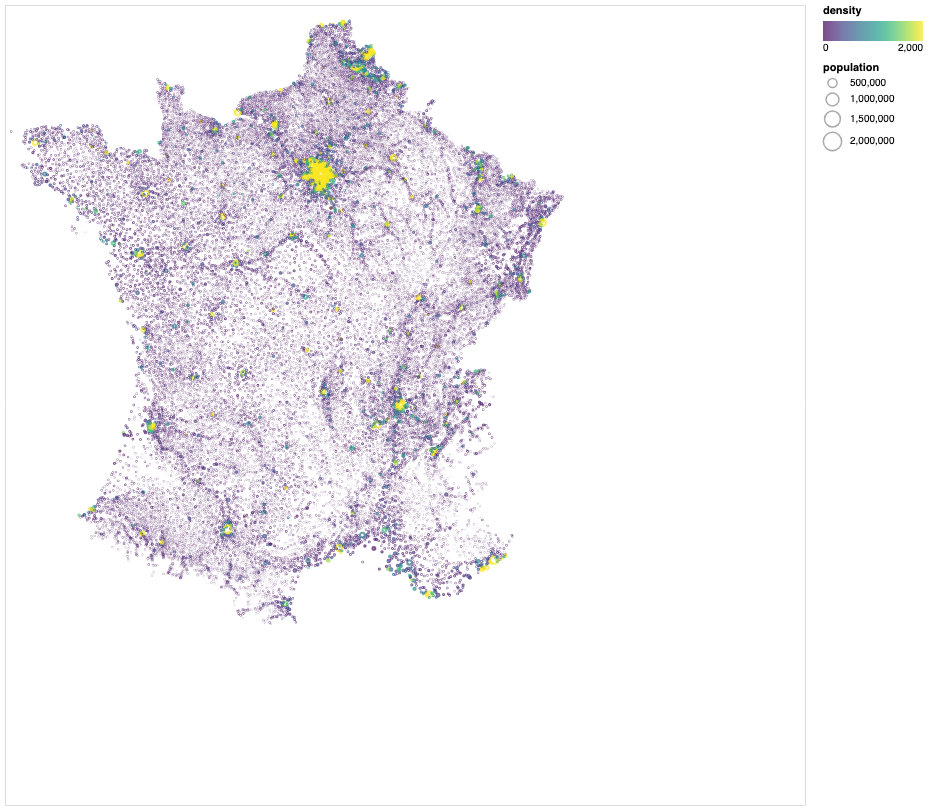

In [76]:
# Let's add tooltips

map = map.encode(
    tooltip=['place:N', 'population:Q', 'density:Q'],
    color=alt.Color('density:Q', scale=alt.Scale(scheme='viridis', domain=[0,2000])) #, type='linear'
)

map

## Multiple views

It would be nice to see a different representationof the distribution of population and densities in France.  Let's go ahead and add in a “histogram” of population and density….

A histogram is just a bar chart of the different bins of values, so let's create a chart using _bars_ for the _marks_.  We want to show the population on the _x_ axis and the number of people in that bin on the _y_ axis:

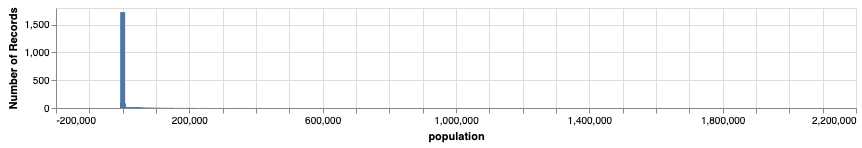

In [77]:
population = alt.Chart(france, width=800, height=100).mark_bar().encode(
    x='population:Q',
    y='count(population):Q',
)

population

That's close, but we're not really binning our data.  Let's go ahead and create slices (or bins) of the data on the *x*
axis.  (In French, we'd call these _tranches_.)

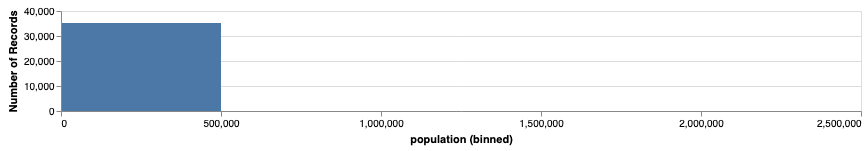

In [78]:
population = alt.Chart(france, width=800, height=100).mark_bar().encode(
    x=alt.X('population:Q', bin=True),
    y='count(population):Q',
)

population

That's better, but the default bins are a bit too big.  Let's override the number of bins.  Also, let's show the number of people in each bin instead of the number of places by replacing the `count()` with the `sum()`.

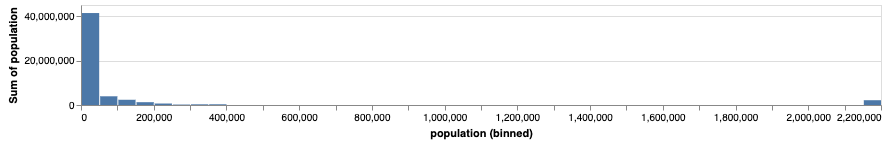

In [79]:
population = alt.Chart(france, width=800, height=100).mark_bar().encode(
    x=alt.X('population:Q', bin=alt.Bin(maxbins=60)),
    y='sum(population):Q',
)

population

### Density histogram

How would you make a histogram of the densities?  Try changing the code below do make it into a _density_ histogram instead of showing the population.

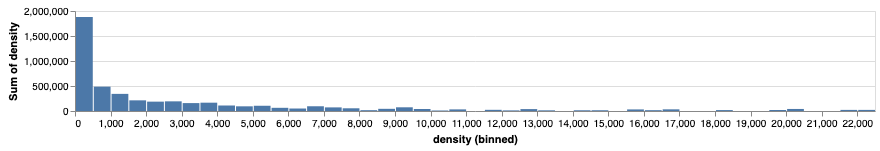

In [80]:
density = alt.Chart(france, width=800, height=100).mark_bar().encode(
    x=alt.X('density:Q', bin=alt.Bin(maxbins=60)),
    y='sum(density):Q',
)

density

# Making a multi-view visualisation (e.g., “dashboard”)

We now have all of the pieces we need to make a multi-view visualisation (what we called a “dashboard” in Tableau).

In Altair, you can combine multiple charts manually using the `&` and `|` operators to combine them _vertically_ or _horizontally_, respectively.

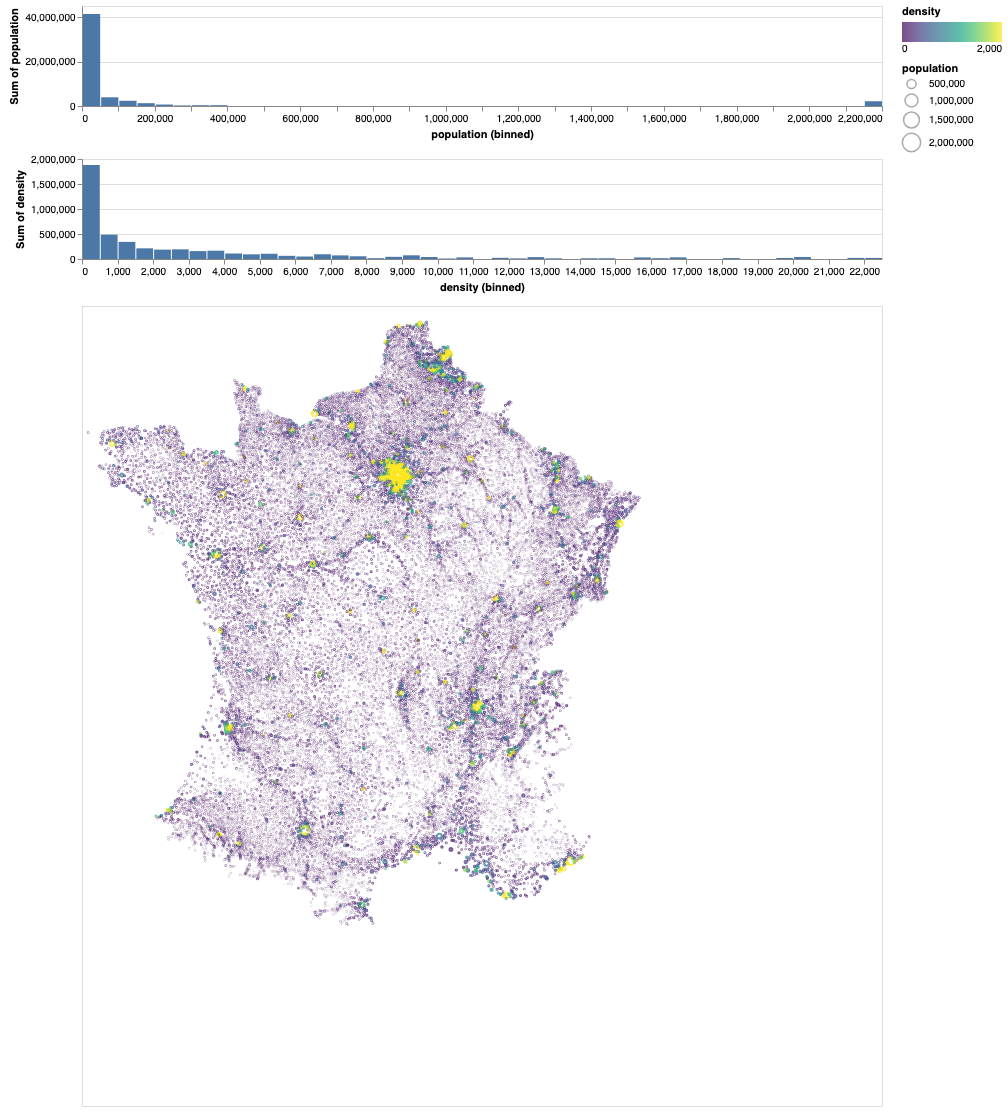

In [81]:
population & density & map

## Other interactions

Beyond tooltips, we want to be able to _select_ data points, _filter_ out data, and to be able to _link views_ so that, say, a selection in one might filter what is shown in another (or alter its presentation in some other way).

Let's start with selections.  There are three kinds of selections:

* intervals — a range of values
* single - a single value
* multi - multiple values

Intervals let the user “brush” over a range of values to select them.  Single selection select a single data point, while multi selections let the use combine single selections (by default with the shift key).  [For more info, see the Altair selections guide](https://altair-viz.github.io/user_guide/interactions.html)

Here, let's add a rectangular selection brush to our map.

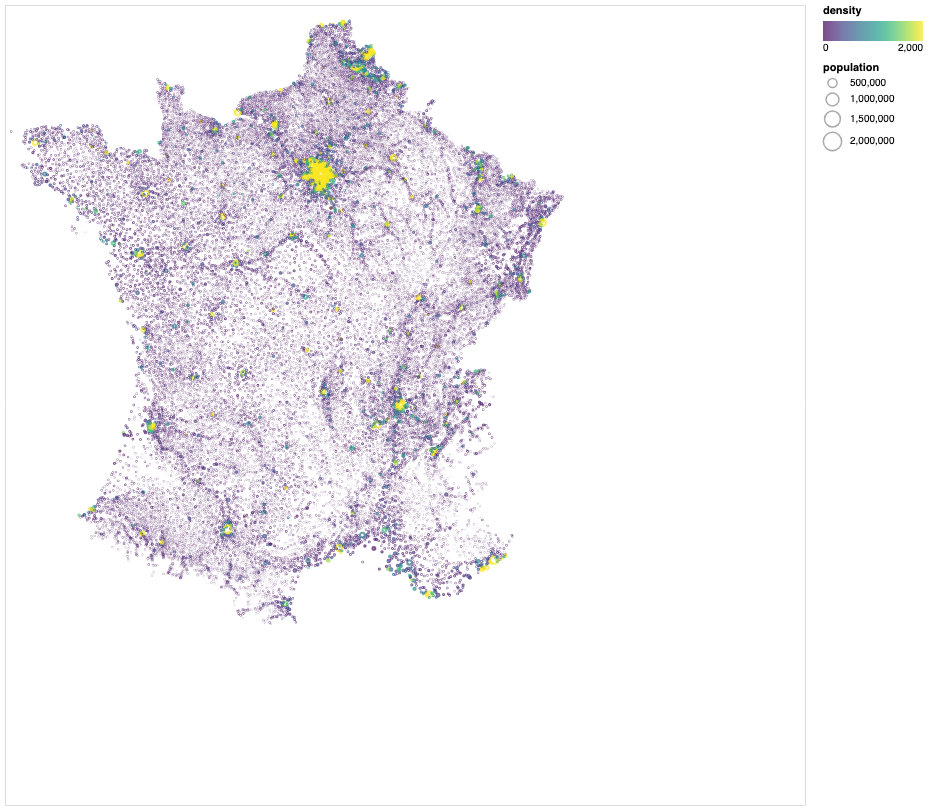

In [82]:
brush = alt.selection_interval()
map.add_selection(brush)

Now try it out.  Try dragging a box around a part of the map.

---

Huh, that sort of works.  We see a selection appear, but it doesn't _do_ anything with it.  Let's fix that.

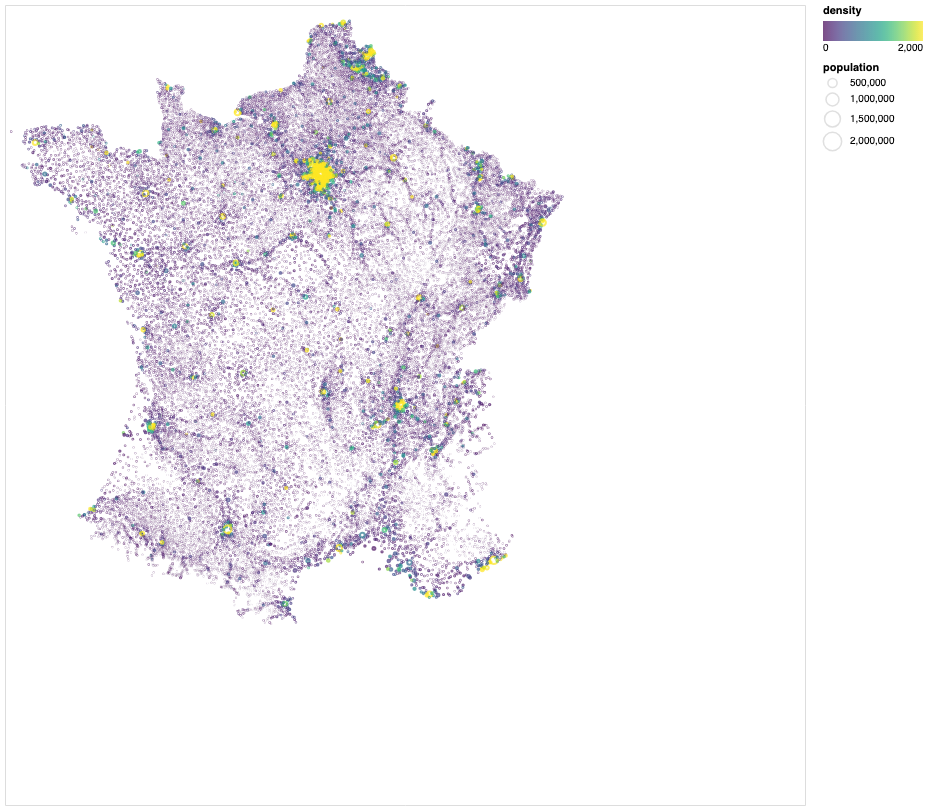

In [86]:
# Let's gray out unselected places

map = alt.Chart(france, width=800, height=800).mark_point(size=1).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)),
    size='population:Q',
    tooltip=['place:N', 'population:Q', 'density:Q'],
    color=alt.condition(brush, 'density:Q', alt.value('lightgrey'), scale=alt.Scale(scheme='viridis', domain=[0,2000])),
).add_selection(brush)

map

Well, that seems to work.  It's a little slow (because we have a _lot_ of _large_ views open in this notebook), but moreover, it doesn't really _do_ much useful.

Let's go ahead and link our selection to the histogram.  Notice that all we need to do to filter the histogram based on the selection is to add a `.transform_filter()` to the histogram that uses the map's selection `brush`.  (See the last line of the histogram.)

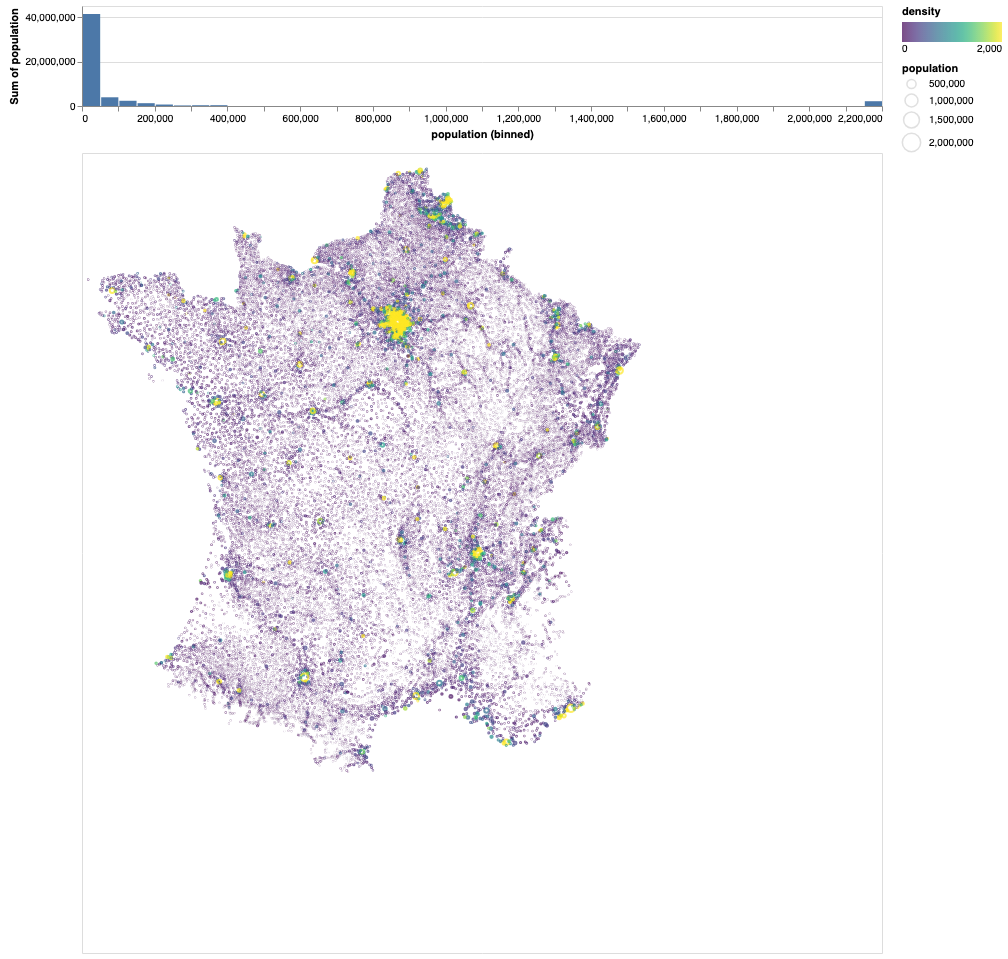

In [85]:
population = population = alt.Chart(france, width=800, height=100).mark_bar().encode(
    x=alt.X('population:Q', bin=alt.Bin(maxbins=60)),
    y='sum(population):Q',
).transform_filter(brush)

population & map

That's great, but it would be nice if we could link the views both ways: a selection in the map updates the histogram or a selection in the histogram updates the map.

To do that, we'll create two selections:

In [69]:
brush = alt.selection_interval()
pop_selection = alt.selection_interval(encodings=['x'])

Notice that the new selection uses an optional `encodings` parameter to indicate that it only selects data items along the `x` encoding from the chart (which we have mapped to the `x` data attribute).

Now update the code below to link the two charts using the new brush. (This code will show an error if you haven't linked things in correctly.)

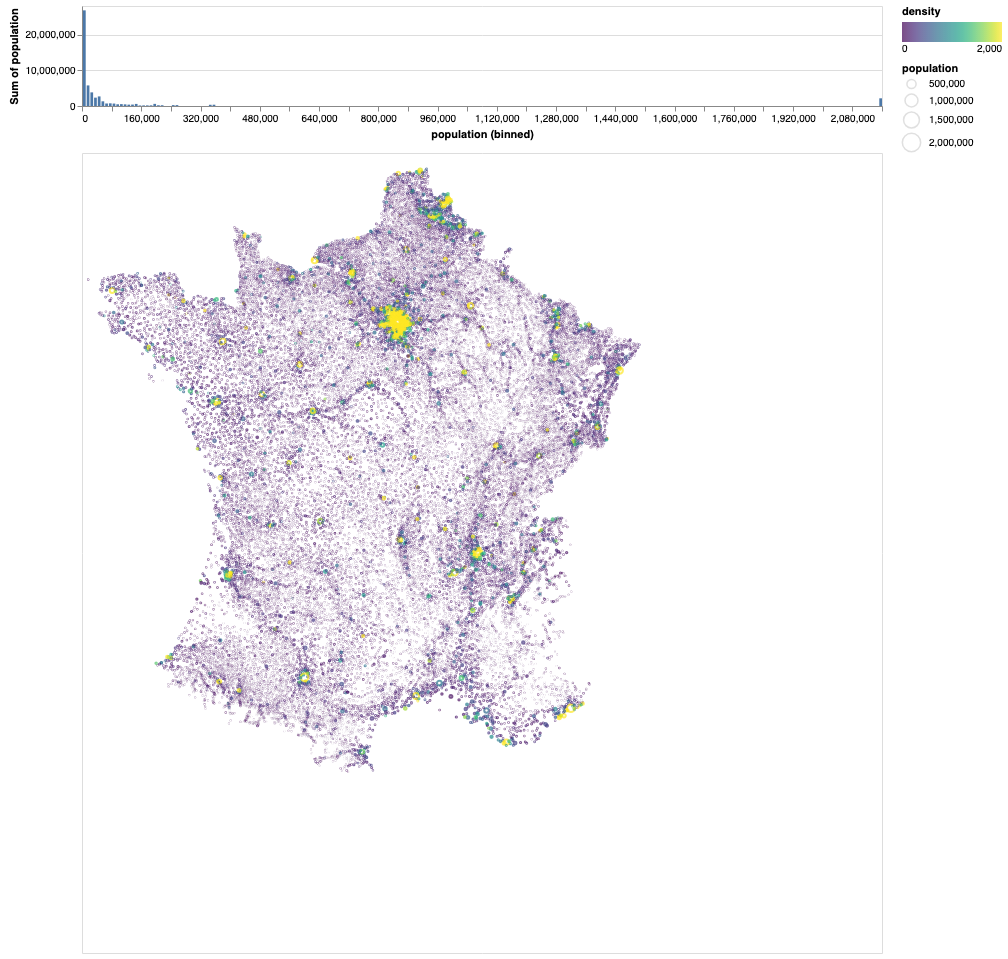

In [101]:
map = alt.Chart(france, width=800, height=800).mark_point(size=1).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)),
    size='population:Q',
    color=alt.condition(pop_selection, 'density:Q', alt.value('lightgrey'), scale=alt.Scale(scheme='viridis', domain=[0,2000])),
).add_selection(brush)

population = alt.Chart(france, width=800, height=100).mark_bar().encode(
    x=alt.X('population:Q', bin=alt.Bin(maxbins=250)),
    y='sum(population):Q'
).add_selection(pop_selection).transform_filter(brush)

population & map

## Exercises

* Add linked selection to density “histogram”
* Try different encodings: explore [alt.Scale][], [alt.Color][], etc.
* Try different marks: mark_rect, mark_tick, mark_circle, …. [Marks documentation][]
* Try making a heatmap of places in France.

[alt.Scale]: https://altair-viz.github.io/user_guide/generated/core/altair.Scale.html#altair.Scale
[alt.Color]: https://altair-viz.github.io/user_guide/generated/channels/altair.Color.html#altair.Color
[Marks documentation]: https://altair-viz.github.io/user_guide/marks.html

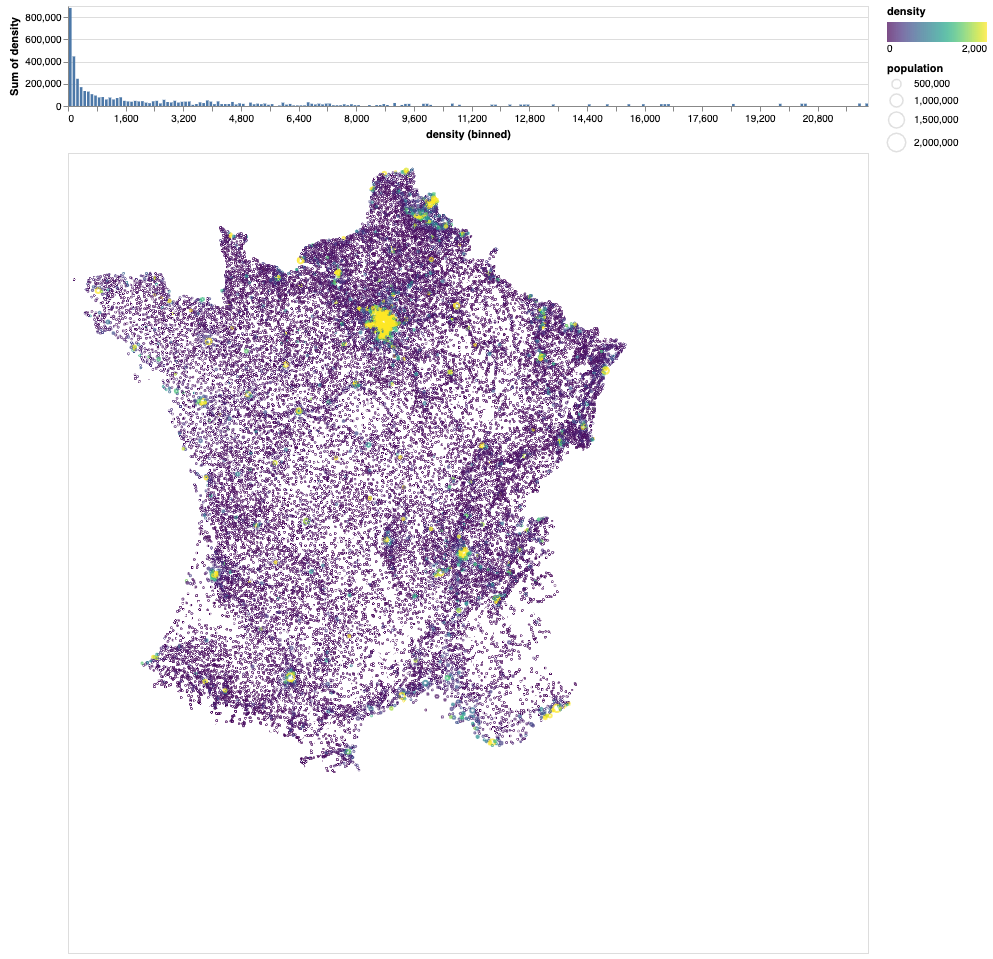

In [3]:
# Add linked selection to density “histogram”

brush = alt.selection_interval()
dens_selection = alt.selection_interval(encodings=['x'])

map = alt.Chart(france, width=800, height=800).mark_point(size=1).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)),
    size='population:Q',
    tooltip=['place:N', 'population:Q', 'density:Q'],
    color=alt.condition(dens_selection, 'density:Q', alt.value('lightgrey'), scale=alt.Scale(scheme='viridis', domain=[0,2000])),
).add_selection(brush)

density = alt.Chart(france, width=800, height=100).mark_bar().encode(
    x=alt.X('density:Q', bin=alt.Bin(maxbins=250)),
    y='sum(density):Q'
).add_selection(dens_selection).transform_filter(brush)

density & map


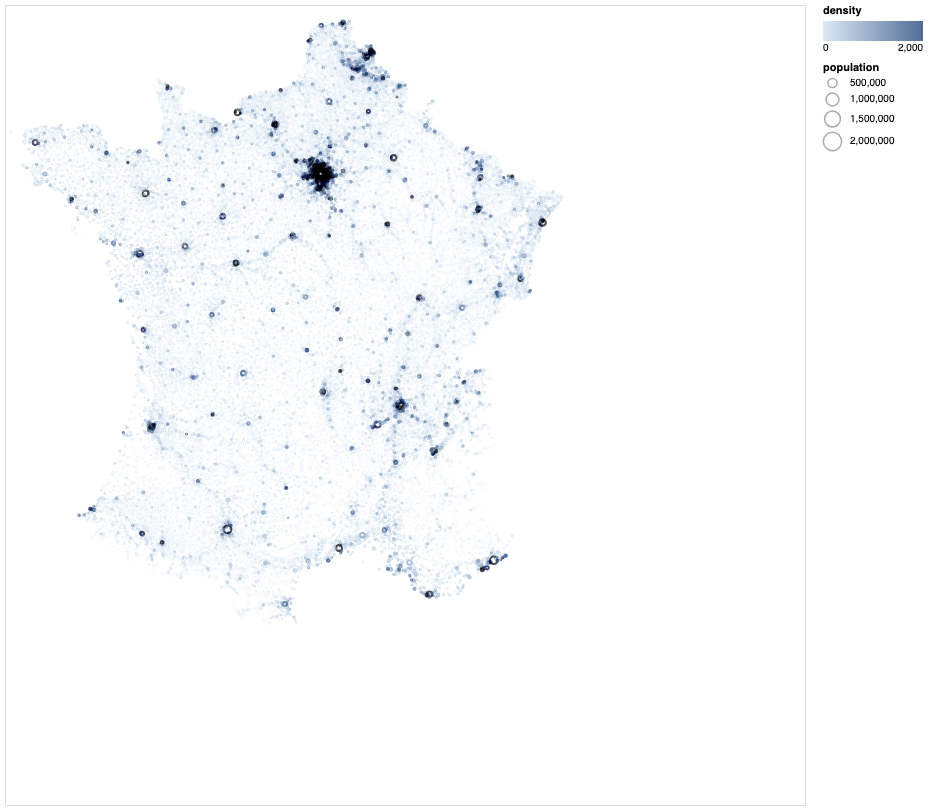

In [130]:
# Try different encodings: explore alt.Scale, alt.Color, etc.

map = alt.Chart(france, width=800, height=800).mark_point(size=1).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)),
    size='population:Q',
    tooltip=['place:N', 'population:Q', 'density:Q'],
    color=alt.Color('density:Q', scale=alt.Scale(type='pow', scheme='viridis', domain=[0,2000]))
)

map

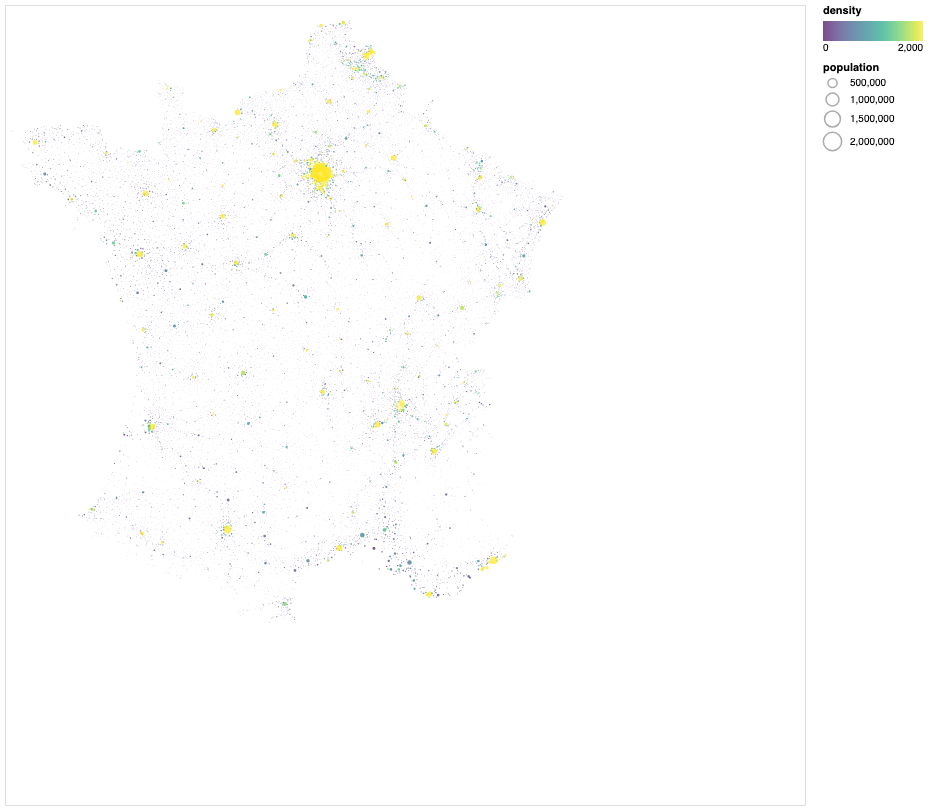

In [99]:
# Try different marks: mark_rect, mark_tick, mark_circle, …. Marks documentation

map = alt.Chart(france, width=800, height=800).mark_circle(size=100).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)),
    size='population:Q',
    color=alt.Color('density:Q', scale=alt.Scale(scheme='viridis', domain=[0,2000]))
)

map

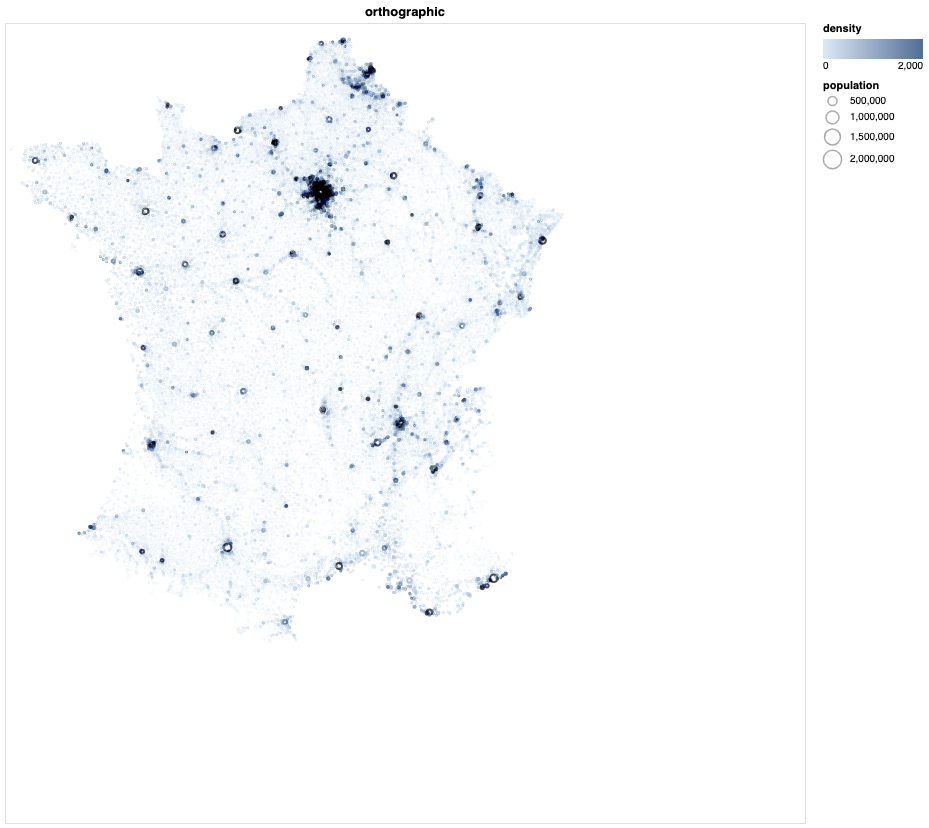

In [133]:
proj = 'orthographic'
map.project(proj)

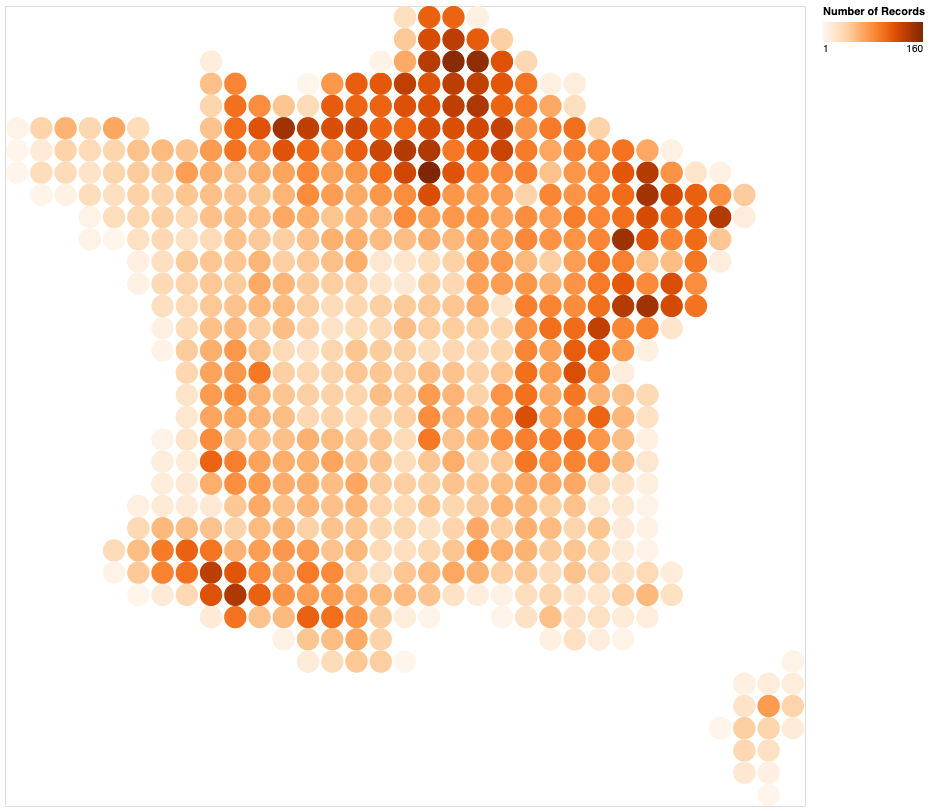

In [198]:
# Free Exploration

map = alt.Chart(france, width=800, height=800).mark_circle(size=500).encode(
    x=alt.X('x:Q', axis=None, bin=alt.Bin(maxbins=60)),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False), bin=alt.Bin(maxbins=60)),
    color=alt.Color('population:Q', aggregate='count', scale=alt.Scale(scheme='oranges'))
)

map

## Bonus exercises

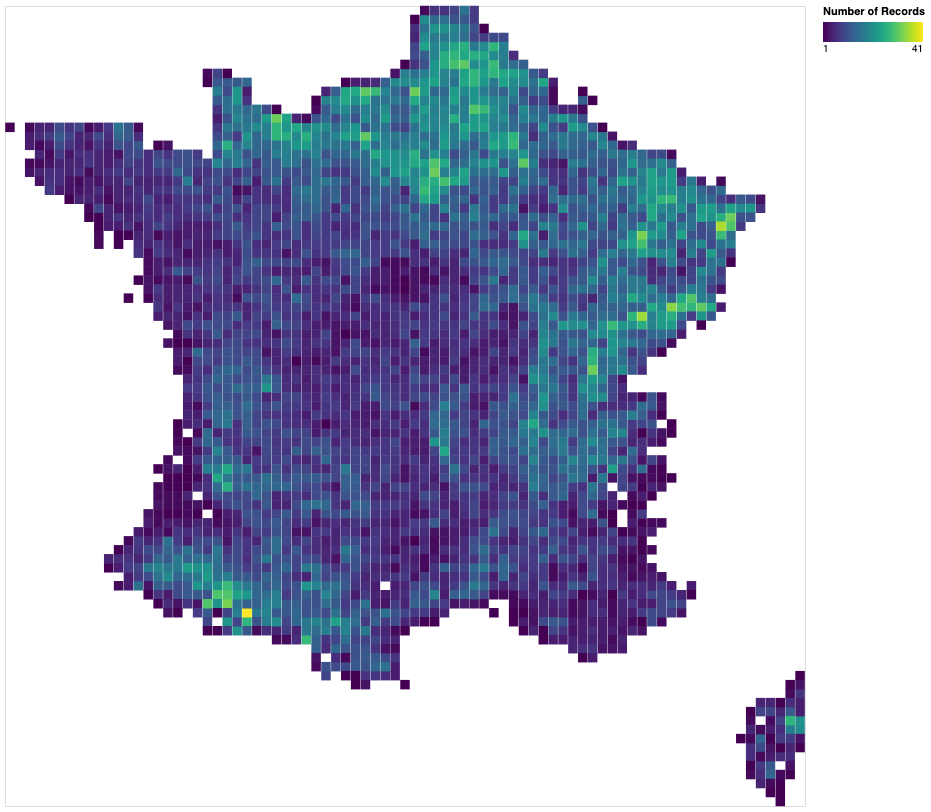

In [190]:
# Try making a heatmap of places in France

map = alt.Chart(france, width=800, height=800).mark_square(size=90).encode(
    x=alt.X('x:Q', axis=None, bin=alt.Bin(maxbins=90)),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False), bin=alt.Bin(maxbins=90)),
    
    color=alt.Color('population:Q', aggregate='count', scale=alt.Scale(scheme='viridis'))
)

map

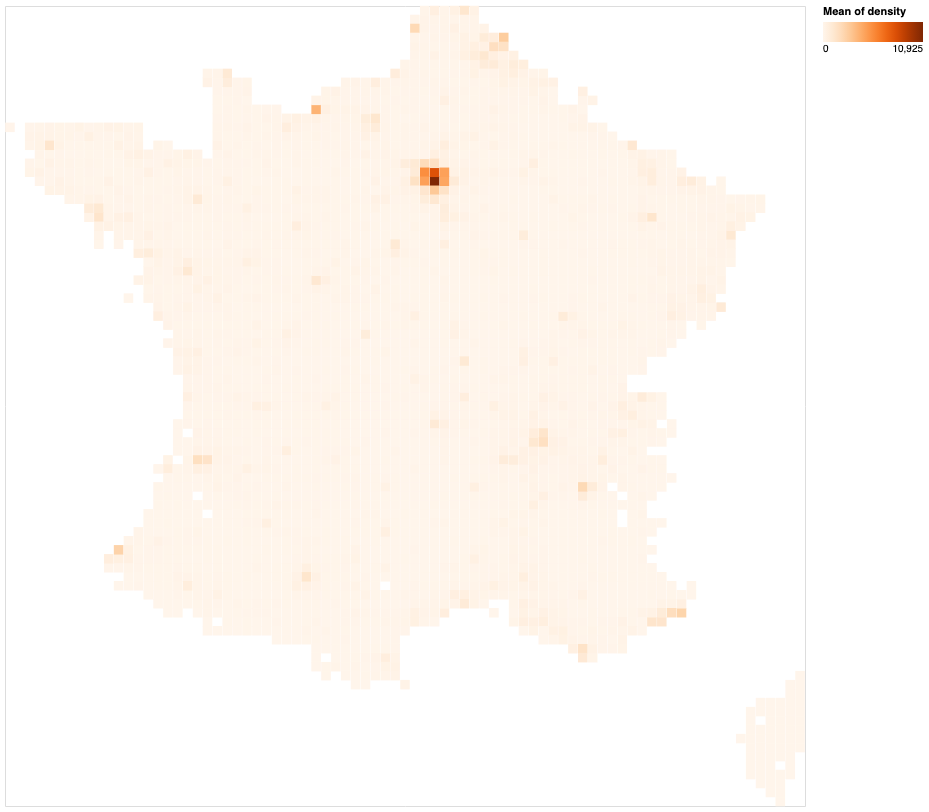

In [201]:
# Or a heatmap of population densities in France

map = alt.Chart(france, width=800, height=800).mark_square(size=90).encode(
    x=alt.X('x:Q', axis=None, bin=alt.Bin(maxbins=90)),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False), bin=alt.Bin(maxbins=90)),
    
    color=alt.Color('density:Q', aggregate='mean', scale=alt.Scale(scheme='oranges'))
)

map

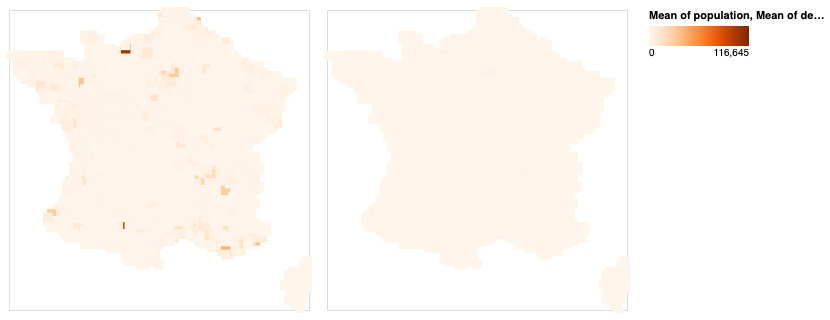

In [210]:
map1 = alt.Chart(france, width=300, height=300).mark_square(size=90).encode(
    x=alt.X('x:Q', axis=None, bin=alt.Bin(maxbins=90)),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False), bin=alt.Bin(maxbins=90)),
    color=alt.Color('population:Q', aggregate='mean', scale=alt.Scale(scheme='oranges'))
)

map2 = alt.Chart(france, width=300, height=300).mark_square(size=90).encode(
    x=alt.X('x:Q', axis=None, bin=alt.Bin(maxbins=90)),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False), bin=alt.Bin(maxbins=90)),
    color=alt.Color('density:Q', aggregate='mean', scale=alt.Scale(scheme='oranges'))
)

chart = alt.hconcat()
for origin in [map1, map2]:
    chart |= origin
chart